### 在图像中添加自定义框

In [1]:
# -*- coding:utf-8 -*-
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

###################################################
#   图像白化(whitening)/标准化处理(standration)    #
###################################################
# 以python自带库来读取图片，并获取图像矩阵的维度
im = np.array(Image.open('beauty.jpg'))
im_size = im.shape
print(im_size)

# 读取图像的原始数据
img_raw_data = tf.gfile.FastGFile('beauty.jpg', 'rb').read()

with tf.Session() as sess:
# 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(img_raw_data)
    # 图像大小调整
    img_data = tf.image.resize_images(img_data, [500, 500], method=1)

    batches = tf.expand_dims(tf.image.convert_image_dtype(img_data, dtype=tf.float32), 0)
    # 给定图像的所有标注框。一个标注框参数[y_min, x_min, y_max, x_max]
    boxes = tf.constant([[[0.05, 0.12, 0.63, 0.70]]])
##    boxes = tf.constant([[[0.05, 0.5, 0.9, 0.7]]])

    result = tf.image.draw_bounding_boxes(batches, boxes)

    result = np.asarray(result.eval().reshape([500, 500, 3]))

    # 可视化
    plt.imshow(result)
    plt.show()

(1500, 1481, 3)


<Figure size 640x480 with 1 Axes>

### 图像色彩调整

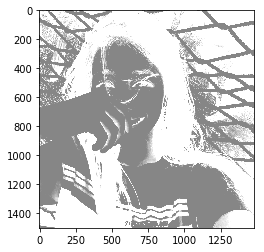

In [2]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

################################
#          图像色彩调整         #
################################
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('beauty.jpg', 'rb').read() # python2使用'r'，python3使用'r'出错，应该用'rb'

with tf.Session() as sess:
# 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(image_raw_data)

    # 图像亮度-0.5
##    adjusted = tf.image.adjust_brightness(img_data, -0.5)

    # 图像亮度+0.5
    adjusted = tf.image.adjust_brightness(img_data, 0.5)

    # tf.image.random_brightness(img_data, max_delta)
    # 在[-max_delta， max_delta]之间图像亮度随机调整
##    adjusted = tf.image.random_brightness(img_data, 0.5)

    # 在亮度增加0.5的前提下，再调整对比度，-3
    adjusted= tf.image.adjust_contrast(adjusted, -3)

    # tf.image.random_contrast(adjusted, lower, higher)
    # 在[lower, higher]范围内随机调整对比度
##    adjusted = tf.image.random_contrast(adjusted, -2, 3)

    # 在已有的基础上调整色相
    adjusted = tf.image.adjust_hue(adjusted, 0.3)
    # 在[-max_delta, max_delta]范围内随机调整色相, max_delta取值范围在[0, 0.5]之间
##    adjusted = tf.image.adjust_hue(adjusted, 0.3)

    # 调整饱和度
    adjusted = tf.image.adjust_saturation(adjusted, -3)
    # 在[lower, higher]范围内随机调整饱和度
##    adjusted = tf.image.random_saturation(adjusted, -5, 1)
    
    beauty = np.asarray(adjusted.eval(), dtype='uint8')
    # 可视化
    plt.imshow(beauty)
    plt.show()


### 图像裁剪与填补

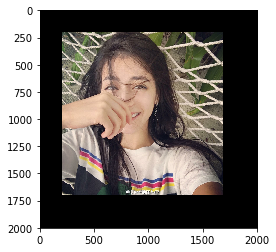

In [3]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

################################
#         图像裁剪与填补        #
################################
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('beauty.jpg','rb').read() # python2使用'r'，python3使用'r'出错，应该用'rb'

with tf.Session() as sess:
    # 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(image_raw_data)

##    # 函数的第一个参数为原始图像，第二三个参数为目标图像大小。
##    # 如果原始图像尺寸大于目标图像，则函数自动截取原图居中的部分
##    cropped = tf.image.resize_image_with_crop_or_pad(img_data, 500, 500)
##    beauty = np.asarray(cropped.eval(), dtype='uint8')
##    
##    # 可视化
##    plt.imshow(beauty)
##    plt.show()
##
##    # 如果原始图像尺寸小于目标图像，则函数在原图周围补0
##    cropped = tf.image.resize_image_with_crop_or_pad(img_data, 1800, 1800)
##    beauty = np.asarray(cropped.eval(), dtype='uint8')
##    
##    # 可视化
##    plt.imshow(beauty)
##    plt.show()
##
##    # 按比例调整图像大小，参数2为比例，取值在(0, 1]之间
##    central_cropped = tf.image.central_crop(img_data, 0.7)
##    beauty = np.asarray(central_cropped.eval(), dtype='uint8')
##    
##    # 可视化
##    plt.imshow(beauty)
##    plt.show()

    ## tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)
    # image: 3-D tensor with shape [height, width, channels]
    # offset_height: Vertical coordinate of the top-left corner of the result in the input.
    # offset_width: Horizontal coordinate of the top-left corner of the result in the input.
    # target_height: Height of the result.
    # target_width: Width of the result.
    # 从指定位置开始裁剪图像，但要求目标图像尺寸小于原图像
##    crop_bounding = tf.image.crop_to_bounding_box(img_data, 200, 200, 500, 500)
##    beauty = np.asarray(crop_bounding.eval(), dtype='uint8')
##    
##    # 可视化
##    plt.imshow(beauty)
##    plt.show()

    ## tf.image.pad_to_bounding_box(image, offset_height, offset_width, target_height, target_width)
    # image: 3-D tensor with shape [height, width, channels]
    # offset_height: Number of rows of zeros to add on top.
    # offset_width: Number of columns of zeros to add on the left.
    # target_height: Height of output image.
    # target_width: Width of output image.
    # 填补时，给定上方和左方要补0的行数和列数，然后在下方和右方补0到目标大小
    pad_bounding = tf.image.pad_to_bounding_box(img_data, 200, 200, 2000, 2000)
    beauty = np.asarray(pad_bounding.eval(), dtype='uint8')
    
    # 可视化
    plt.imshow(beauty)
    plt.show()

### 图像编解码

路径已经存在！
[[[ 7 13  9]
  [ 7 13  9]
  [ 7 13  9]
  ..., 
  [ 7 11 20]
  [ 7 11 20]
  [ 6 10 19]]

 [[23 29 25]
  [23 29 25]
  [24 30 26]
  ..., 
  [13 17 26]
  [13 17 26]
  [12 16 25]]

 [[42 49 42]
  [42 49 42]
  [43 50 43]
  ..., 
  [21 26 32]
  [21 26 32]
  [20 25 31]]

 ..., 
 [[40 32 53]
  [51 44 62]
  [74 67 85]
  ..., 
  [37 25 35]
  [36 24 34]
  [36 24 34]]

 [[26 21 43]
  [27 22 44]
  [35 30 52]
  ..., 
  [37 25 35]
  [36 24 34]
  [36 24 34]]

 [[28 24 47]
  [26 22 45]
  [29 24 46]
  ..., 
  [37 25 35]
  [36 24 34]
  [36 24 34]]]


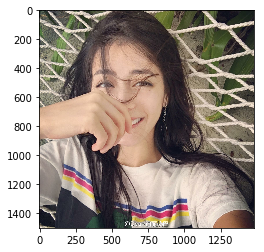

(?, ?, ?)


In [4]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

################################
#          图像编解码           #
################################

# 在当前文件夹下创建一个名为 results 的新目录
curPath=os.getcwd()
tempPath='results'
targetPath=curPath+os.path.sep+tempPath
#print(targetPath)
if not os.path.exists(targetPath):
    os.makedirs(targetPath)
else:
    print('路径已经存在！')
    
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('beauty.jpg','rb').read() # python2使用'r'，python3使用'r'出错，应该用'rb'

with tf.Session() as sess:
    # 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    print (img_data.eval())

    # 可视化
    plt.imshow(img_data.eval())
    plt.show()

    # 将图像的三维矩阵重新按照jpeg格式编码并存入文件
    encoded_image = tf.image.encode_jpeg(img_data)
    with tf.gfile.GFile(targetPath + os.path.sep + 'en_beauty.jpg','wb') as f:
        f.write(encoded_image.eval())
    print (img_data.get_shape())

### 图像大小调整

(1000, 1000, ?)


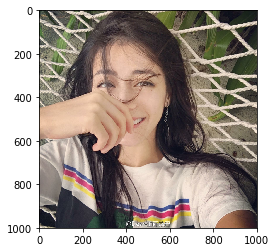

In [5]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

################################
#         图像大小调整          #
################################
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('beauty.jpg','rb').read() # python2使用'r'，python3使用'r'出错，应该用'rb'

with tf.Session() as sess:
    # 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(image_raw_data)

    # method参数：
    # 0，双线性插值法
    # 1，最近邻居法
    # 2，双三次插值法
    # 3，面积插值法
    resized0 = tf.image.resize_images(img_data, [1000, 1000], method=0) # method=0、1、2、3

    print (resized0.get_shape()) # (1000, 1000, ?)
    beauty = np.asarray(resized0.eval(), dtype='uint8')
    
    # 可视化
    plt.imshow(beauty)
    plt.show()

### 图像翻转

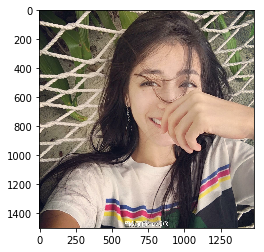

In [6]:
#！/usr/bin/env python
# -*- coding:utf-8 -*-

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

################################
#           图像翻转           #
################################
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('beauty.jpg','rb').read() # python2使用'r'，python3使用'r'出错，应该用'rb'

with tf.Session() as sess:
    # 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(image_raw_data)

    # 上下翻转
##    flipped = tf.image.flip_up_down(img_data)
    # 以一定概率上下翻转
##    flipped = tf.image.random_flip_up_down(img_data)
    # 左右翻转
##    flipped = tf.image.flip_left_right(img_data)
    # 一定概率左右翻转
    flipped = tf.image.random_flip_left_right(img_data, seed=1)
    # 沿对角线翻转
##    flipped = tf.image.transpose_image(img_data)
    beauty = np.asarray(flipped.eval(), dtype='uint8')
    # 可视化
    plt.imshow(beauty)
    plt.show()

### 图像白化(whitening)/标准化处理(standration)

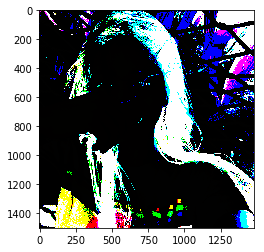

In [7]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

###################################################
#   图像白化(whitening)/标准化处理(standration)    #
###################################################
# 读取图像的原始数据
img_raw_data = tf.gfile.FastGFile('beauty.jpg', 'rb').read()

with tf.Session() as sess:
# 使用图像对应的格式解码得到对应的三维矩阵，如tf.image.decode_png()函数对应PNG格式的解码
    img_data = tf.image.decode_jpeg(img_raw_data)

    # 对图像进行标准化，旧版为 tf.image.per_image_whitening
    adjusted = tf.image.per_image_standardization(img_data)
    adjusted = np.asarray(adjusted.eval(), dtype='uint8')

    # 可视化
    plt.imshow(adjusted)
    plt.show()